In [1]:
%pip uninstall -y apache-beam pyarrow cudf-cu12 dask-cudf-cu12 datasets pandas


Found existing installation: pyarrow 16.1.0
Uninstalling pyarrow-16.1.0:
  Successfully uninstalled pyarrow-16.1.0
Found existing installation: datasets 3.6.0
Uninstalling datasets-3.6.0:
  Successfully uninstalled datasets-3.6.0
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3


In [2]:
# 1) Install the right versions into THIS kernel
%pip install --no-cache-dir -U \
  "datasets>=3.4.1,!=4.0.*,!=4.1.0" \
  "pyarrow==16.1.0" \
  "pandas==2.2.3" \
  "unsloth>=2024.7.21" \
  "transformers>=4.43" \
  "accelerate>=0.33" \
  "peft>=0.11.0" \
  "bitsandbytes>=0.43.0" \
  "sentencepiece>=0.2.0"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 211.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 162.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 252.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
# # 2) Import order: Unsloth first, then anything that might pull in transformers
# import unsloth

# from unsloth import FastLanguageModel
# import torch

# print("OK: unsloth and torch imported")


In [4]:
import datasets, pyarrow, pandas
print("datasets:", datasets.__version__)   # not 4.0.* and not 4.1.0
print("pyarrow:", pyarrow.__version__)     # 16.1.0
print("pandas:", pandas.__version__)       # 2.2.3


datasets: 3.6.0
pyarrow: 16.1.0
pandas: 2.2.3


In [5]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
test = "gsm8k_test_translated_all.xlsx"
train = "gsm8k_train_translated_all.xlsx"

# Load the latest version
test_dataset = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arefehrajabian/persian-gsm",
  test,

)

train_dataset = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arefehrajabian/persian-gsm",
  train,

)
train_dataset.head()

/tmp/ipython-input-1223728155.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  test_dataset = kagglehub.load_dataset(
/tmp/ipython-input-1223728155.py:16: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  train_dataset = kagglehub.load_dataset(


,question,answer,translated_question,steps,translated_steps
0,Natalia sold clips to 48 of her friends in Apr...,72,ناتالیا در ماه آوریل گیره به ۴۸ نفر از دوستانش...,Natalia sold 48/2 = <<48/2=24>>24 clips in May...,ناتالیا در ماه می 48/2 = <<48/2=24>>24 گیره فر...
1,Weng earns $12 an hour for babysitting. Yester...,10,ونگ در ساعت ۱۲ دلار برای نگهداری از کودک دستمز...,Weng earns 12/60 = $<<12/60=0.2>>0.2 per minut...,ونگ 12/60 = $<<12/60=0.2>>0.2 در هر دقیقه درآم...
2,Betty is saving money for a new wallet which c...,5,بتي در حال پس‌انداز پول برای یک کیف پول جدید ا...,"In the beginning, Betty has only 100 / 2 = $<<...",در ابتدا، بتی فقط 100 / 2 = $<<100/2=50>>50 دل...
3,"Julie is reading a 120-page book. Yesterday, s...",42,جولی در حال خواندن کتابی ۱۲۰ صفحه‌ای است. او د...,Maila read 12 x 2 = <<12*2=24>>24 pages today....,میلا امروز 12 x 2 = <<12*2=24>>24 صفحه خواند.\...
4,James writes a 3-page letter to 2 different fr...,624,جیمز هر هفته دو بار نامه‌های ۳ صفحه‌ای به ۲ دو...,He writes each friend 3*2=<<3*2=6>>6 pages a w...,او برای هر دوست ۳*۲=<<3*2=6>> ۶ صفحه در هفته م...


In [6]:
test_dataset.head()


,question,answer,translated_question
0,Janet’s ducks lay 16 eggs per day. She eats th...,18,مرغ‌های جانت هر روز ۱۶ تخم می‌گذارند. او هر صب...
1,A robe takes 2 bolts of blue fiber and half th...,3,یک ردای عبا ۲ گُل (بُلت) الیاف آبی و نصف آن ال...
2,Josh decides to try flipping a house. He buys...,70000,جاش تصمیم می‌گیرد یک خانه را بازسازی و بفروشد....
3,James decides to run 3 sprints 3 times a week....,540,جیمز تصمیم می‌گیرد ۳ دوی سرعت را ۳ بار در هفته...
4,"Every day, Wendi feeds each of her chickens th...",20,هر روز، وندی به هر یک از مرغ‌هایش سه پیمانه خو...


In [7]:
from datasets import Dataset

train_dataset_hf = Dataset.from_pandas(train_dataset)


In [8]:
# Initializing the Llama-3.1-8B model and its tokenizer

from unsloth import FastLanguageModel
import torch
max_seq_length = 2048
dtype = None # None for auto detection.
load_in_4bit = True # Use 4bit quantization to reduce memory usage.

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "Qwen/Qwen2.5-7B-Instruct",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)
# model.enable_input_require_grads()

# # 2) Prepare for training the Unsloth way
# FastLanguageModel.for_training(model, use_gradient_checkpointing=False)
# # FastLanguageModel.for_training(model)

# model.config.use_cache = False
# FastLanguageModel.for_training(model, use_gradient_checkpointing=False)
# model.config.use_cache = False
# # belt-and-suspenders:
# if hasattr(model, "gradient_checkpointing_disable"):
#     model.gradient_checkpointing_disable()
model = FastLanguageModel.get_peft_model(
    model,
    r=16, lora_alpha=32, lora_dropout=0.05, bias="none",
    target_modules=["q_proj","k_proj","v_proj","o_proj","gate_proj","up_proj","down_proj"],
)

# If you disabled GC earlier, that’s fine; it’s unrelated to this error.
model.config.use_cache = False


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.10.12: Fast Qwen2 patching. Transformers: 4.57.1.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.16G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.05.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2025.10.12 patched 28 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


In [9]:
# Setting up a template prompt and using a function to tokenizing the input.
# Our Input of the fuction is one row of our dataset.
# We use just modified_code and original_code columns. Putting modified_code detail in the Input and original_code in the Response.
# We are using the best prompt for instruction.

alpaca_prompt = """You are a helpful assistant. Solve the following question step by step if steps are given, then provide the final answer.

### Input:
Question: {}
Steps: {}

### Response:
{}"""
EOS_TOKEN = tokenizer.eos_token

def formatting_prompts_func(examples):
    questions = examples["translated_question"]
    steps     = examples["translated_steps"]
    answers   = examples["answer"]

    texts = []
    for q, s, a in zip(questions, steps, answers):
        text = alpaca_prompt.format(q, s, a) + EOS_TOKEN
        texts.append(text)

    return {"text": texts}


dataset = train_dataset_hf.map(formatting_prompts_func, batched = True,)
dataset

Map:   0%|          | 0/7473 [00:00<?, ? examples/s]

Dataset({
    features: ['question', 'answer', 'translated_question', 'steps', 'translated_steps', 'text'],
    num_rows: 7473
})

In [10]:
print(dataset[0]['text'])

You are a helpful assistant. Solve the following question step by step if steps are given, then provide the final answer.

### Input:
Question: ناتالیا در ماه آوریل گیره به ۴۸ نفر از دوستانش فروخت و سپس در ماه می نصف این تعداد گیره فروخت. در مجموع ناتالیا در ماه آوریل و می چند گیره فروخت؟
Steps: ناتالیا در ماه می 48/2 = <<48/2=24>>24 گیره فروخت.
ناتالیا در مجموع در ماه آوریل و می 48+24 = <<48+24=72>>72 گیره فروخت.
#### 72

### Response:
72<|im_end|>


In [11]:
from peft import LoraConfig, get_peft_model

# 1. Define LoRA configuration
lora_config = LoraConfig(
    r=16,                 # Rank of LoRA matrices
    lora_alpha=32,        # Scaling factor
    target_modules=["q_proj", "v_proj"],  # Common modules to tune in transformers
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

# 2. Wrap quantized model with LoRA
model = get_peft_model(model, lora_config)

# 3. Optional: print trainable params
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)


/usr/local/lib/python3.12/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


base_model.model.base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight
base_model.model.base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight
base_model.model.base_model.model.model.layers.0.self_attn.k_proj.lora_A.default.weight
base_model.model.base_model.model.model.layers.0.self_attn.k_proj.lora_B.default.weight
base_model.model.base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight
base_model.model.base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight
base_model.model.base_model.model.model.layers.0.self_attn.o_proj.lora_A.default.weight
base_model.model.base_model.model.model.layers.0.self_attn.o_proj.lora_B.default.weight
base_model.model.base_model.model.model.layers.0.mlp.gate_proj.lora_A.default.weight
base_model.model.base_model.model.model.layers.0.mlp.gate_proj.lora_B.default.weight
base_model.model.base_model.model.model.layers.0.mlp.up_proj.lora_A.default.weight
base_model.model.base_model.model.model.lay

In [12]:
# Setting up the attributes of training our model

from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 100,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        save_strategy="epoch",  # Save model after each epoch (optional)
    ),
)


Unsloth: Tokenizing ["text"] (num_proc=6):   0%|          | 0/7473 [00:00<?, ? examples/s]

In [13]:
#@title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.741 GB.
6.91 GB of memory reserved.


In [14]:
trainer_stats = trainer.train()

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None}.
The model is already on multiple devices. Skipping the move to device specified in `args`.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 7,473 | Num Epochs = 1 | Total steps = 100
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 40,370,176 of 7,655,986,688 (0.53% trained)
wandb: Currently logged in as: rajabian-arefeh79 (rajabian-arefeh79-iran-university-of-science-and-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Detected [huggingface_hub.inference, openai] in use.
wandb: Use W&B Weave for improved LLM call tracing. Install Weave with `pip install weave` then add `import weave` to the top of your script.
wandb: For more information, check out the docs at: https://weave-docs.wandb.ai/


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,1.295700
2,1.384600
3,1.471200
4,1.260600
5,1.151900
6,0.962800
7,0.999000
8,0.868700
9,0.846600
10,0.862600


In [15]:
from peft import LoraConfig, get_peft_model

# 1. Define LoRA configuration
lora_config = LoraConfig(
    r=16,                 # Rank of LoRA matrices
    lora_alpha=32,        # Scaling factor
    target_modules=["q_proj", "v_proj"],  # Common modules to tune in transformers
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

# 2. Wrap quantized model with LoRA
model = get_peft_model(model, lora_config)

# 3. Optional: print trainable params
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)


/usr/local/lib/python3.12/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


base_model.model.base_model.model.base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight
base_model.model.base_model.model.base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight
base_model.model.base_model.model.base_model.model.model.layers.0.self_attn.k_proj.lora_A.default.weight
base_model.model.base_model.model.base_model.model.model.layers.0.self_attn.k_proj.lora_B.default.weight
base_model.model.base_model.model.base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight
base_model.model.base_model.model.base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight
base_model.model.base_model.model.base_model.model.model.layers.0.self_attn.o_proj.lora_A.default.weight
base_model.model.base_model.model.base_model.model.model.layers.0.self_attn.o_proj.lora_B.default.weight
base_model.model.base_model.model.base_model.model.model.layers.0.mlp.gate_proj.lora_A.default.weight
base_model.model.base_model.model.base_model.model.model.l

In [16]:
# # Setting up the attributes of training our model

# from trl import SFTTrainer
# from transformers import TrainingArguments
# from unsloth import is_bfloat16_supported

# trainer = SFTTrainer(
#     model = model,
#     tokenizer = tokenizer,
#     train_dataset = dataset,
#     dataset_text_field = "text",
#     max_seq_length = max_seq_length,
#     dataset_num_proc = 2,
#     packing = False, # Can make training 5x faster for short sequences.
#     args = TrainingArguments(
#         per_device_train_batch_size = 2,
#         gradient_accumulation_steps = 4,
#         warmup_steps = 5,
#         max_steps = 100,
#         learning_rate = 2e-4,
#         fp16 = not is_bfloat16_supported(),
#         bf16 = is_bfloat16_supported(),
#         logging_steps = 1,
#         optim = "adamw_8bit",
#         weight_decay = 0.01,
#         lr_scheduler_type = "linear",
#         seed = 3407,
#         output_dir = "outputs",
#         save_strategy="epoch",  # Save model after each epoch (optional)
#     ),
# )


Unsloth: Tokenizing ["text"] (num_proc=6):   0%|          | 0/7473 [00:00<?, ? examples/s]

In [17]:
# #@title Show current memory stats
# gpu_stats = torch.cuda.get_device_properties(0)
# start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
# max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
# print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
# print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.741 GB.
9.18 GB of memory reserved.


In [21]:
trainer_stats = trainer.train()

The model is already on multiple devices. Skipping the move to device specified in `args`.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 7,473 | Num Epochs = 1 | Total steps = 100
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 40,370,176 of 7,655,986,688 (0.53% trained)


Step,Training Loss
1,0.529300
2,0.563500
3,0.604000
4,0.581200
5,0.550000
6,0.532700
7,0.604800
8,0.587900
9,0.587200
10,0.598000


In [31]:
from peft import LoraConfig, get_peft_model

# 1. Define LoRA configuration
lora_config = LoraConfig(
    r=16,                 # Rank of LoRA matrices
    lora_alpha=32,        # Scaling factor
    target_modules=["q_proj", "v_proj"],  # Common modules to tune in transformers
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

# 2. Wrap quantized model with LoRA
model = get_peft_model(model, lora_config)

# 3. Optional: print trainable params
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)


/usr/local/lib/python3.12/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


base_model.model.base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight
base_model.model.base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight
base_model.model.base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight
base_model.model.base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight
base_model.model.base_model.model.model.layers.1.self_attn.q_proj.lora_A.default.weight
base_model.model.base_model.model.model.layers.1.self_attn.q_proj.lora_B.default.weight
base_model.model.base_model.model.model.layers.1.self_attn.v_proj.lora_A.default.weight
base_model.model.base_model.model.model.layers.1.self_attn.v_proj.lora_B.default.weight
base_model.model.base_model.model.model.layers.2.self_attn.q_proj.lora_A.default.weight
base_model.model.base_model.model.model.layers.2.self_attn.q_proj.lora_B.default.weight
base_model.model.base_model.model.model.layers.2.self_attn.v_proj.lora_A.default.weight
base_model.model.base_model.mode

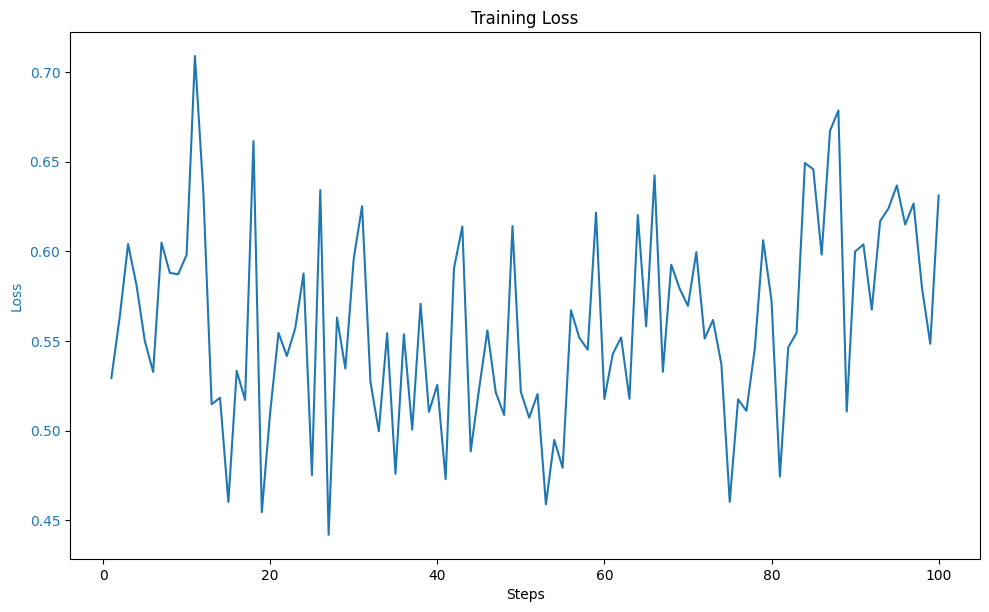

In [32]:
# Plotting the training loss of our training.
# Also, we can visit other plots on https://wandb.me/wandb-core

import matplotlib.pyplot as plt


log_history = trainer.state.log_history

# Initialize lists for loss, accuracy, and steps
losses = []
steps = []

# Collect data for plotting (loss)
for log in log_history:
    if 'loss' in log:
        losses.append(log['loss'])
        steps.append(log['step'])

# Plotting loss
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting loss
ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(steps, losses, label='Loss', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # To make sure the labels don't overlap
plt.title('Training Loss')
plt.show()

In [33]:
import torch, gc
gc.collect(); torch.cuda.empty_cache()


In [34]:
trainer.save_model(trainer.args.output_dir)
tokenizer.save_pretrained(trainer.args.output_dir)


('outputs/tokenizer_config.json',
 'outputs/special_tokens_map.json',
 'outputs/chat_template.jinja',
 'outputs/vocab.json',
 'outputs/merges.txt',
 'outputs/added_tokens.json',
 'outputs/tokenizer.json')

**now i changed runtime**

In [1]:
# Clean
!pip -q uninstall -y torch torchvision torchaudio xformers bitsandbytes triton qwen torchao || true

# PyTorch cu121 (CUDA 12.1) — solid with bnb
!pip -q install --index-url https://download.pytorch.org/whl/cu121 \
  torch==2.4.1 torchvision==0.19.1 torchaudio==2.4.1

# Core libs
!pip -q install "transformers==4.45.2" "accelerate==0.34.2" "peft==0.13.2"

# bitsandbytes with CUDA support
!pip -q install "bitsandbytes==0.43.3"

# Triton matching this Torch (gives you triton.ops)
!pip -q install "triton==2.3.1"

# (Optional) make sure the third-party 'qwen' package is NOT installed
!pip -q uninstall -y qwen || true

# Sanity check
import torch, os, bitsandbytes as bnb
print("Torch:", torch.__version__, "| CUDA:", torch.version.cuda)
print("CUDA available:", torch.cuda.is_available(), "| GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else None)
print("bnb libs:", [p for p in os.listdir(os.path.dirname(bnb.__file__)) if p.startswith("libbitsandbytes_cuda")])
import triton, importlib
print("Triton:", getattr(triton, "__version__", "unknown"))
import importlib; importlib.import_module("triton.ops"); print("triton.ops import OK")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.9/798.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

Torch: 2.4.1+cu121 | CUDA: 12.1
CUDA available: False | GPU: None
bnb libs: ['libbitsandbytes_cuda117_nocublaslt.so', 'libbitsandbytes_cuda123.so', 'libbitsandbytes_cuda124_nocublaslt.so', 'libbitsandbytes_cuda122.so', 'libbitsandbytes_cuda120.so', 'libbitsandbytes_cuda124.so', 'libbitsandbytes_cuda117.so', 'libbitsandbytes_cuda118_nocublaslt.so', 'libbitsandbytes_cuda118.so', 'libbitsandbytes_cuda121.so', 'libbitsandbytes_cuda121_nocublaslt.so', 'libbitsandbytes_cuda125_nocublaslt.so', 'libbitsandbytes_cuda122_nocublaslt.so', 'libbitsandbytes_cuda123_nocublaslt.so', 'libbitsandbytes_cuda125.so', 'libbitsandbytes_cuda120_nocublaslt.so']
Triton: 2.3.1
triton.ops import OK


In [2]:
import os, torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import PeftModel

BASE = "Qwen/Qwen2.5-7B-Instruct"           # <- your base
ADAPTER_DIR = "/content/outputs"            # <- your adapters (or a checkpoint dir)

# Prefer tokenizer from adapters if present
tok_src = ADAPTER_DIR if os.path.exists(f"{ADAPTER_DIR}/tokenizer.json") else BASE
tokenizer = AutoTokenizer.from_pretrained(tok_src, use_fast=True)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,   # use torch.bfloat16 if your GPU supports it well
    bnb_4bit_use_double_quant=True,
)

# If VRAM is tight, allow CPU offload
max_memory = {0: "14GiB", "cpu": "48GiB"}   # adjust GPU budget to your card (T4 -> "10GiB")

base = AutoModelForCausalLM.from_pretrained(
    BASE,
    quantization_config=bnb_config,
    device_map="auto",
    max_memory=max_memory,          # allows splitting across GPU/CPU instead of crashing
    offload_folder="/content/offload",
    offload_state_dict=True,
    attn_implementation="sdpa",     # avoid custom kernels
    low_cpu_mem_usage=True,
)

model = PeftModel.from_pretrained(base, ADAPTER_DIR)
model.eval()
print("Loaded.")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend


RuntimeError: CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend

In [ ]:
@torch.inference_mode()
def ask_math_fa(q, max_new_tokens=180):
    messages = [
        {"role":"system","content":"تو یک کمک‌معلم ریاضی فارسی هستی. پاسخ دقیق و مختصر بده."},
        {"role":"user","content": q}
    ]
    text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    inputs = tokenizer(text, return_tensors="pt").to(model.device)
    out = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        temperature=0.3, top_p=0.9, do_sample=True,
        repetition_penalty=1.05,
        pad_token_id=tokenizer.eos_token_id,
    )
    return tokenizer.decode(out[0], skip_special_tokens=True)

print(ask_math_fa("اگر ۳x + ۵ = ۲۰ باشد، مقدار x چند است؟"))


In [26]:
import os, json
ADAPTER_DIR = "/content/outputs/checkpoint-100"  # <-- set to your Qwen SFT output

with open(os.path.join(ADAPTER_DIR, "adapter_config.json")) as f:
    ac = json.load(f)

print("Adapter dir:", ADAPTER_DIR)
print("base_model_name_or_path:", ac.get("base_model_name_or_path"))


Adapter dir: /content/outputs/checkpoint-100
base_model_name_or_path: None


***i want to find files***

In [ ]:
print("output_dir =", trainer.args.output_dir)
print("save_strategy =", trainer.args.save_strategy)
print("global_step =", trainer.state.global_step)


In [ ]:
from transformers.trainer_utils import get_last_checkpoint
last_ckpt = get_last_checkpoint(trainer.args.output_dir)
print("last_checkpoint =", last_ckpt)
